In [1]:
#!pip3 install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
print(default_of_credit_card_clients.metadata) 
  
# variable information 
print(default_of_credit_card_clients.variables)

{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

In [3]:
#importing the libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# other libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



In [5]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [8]:
print(X.shape)

X.head()

(30000, 23)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [10]:
y.head()

,Y
0,1
1,1
2,0
3,0
4,0


In [12]:
# Combine features and target into a single DataFrame 
df = pd.concat([X, y], axis=1)


df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Let's have a quick look at the data set before beginning the analysis

In [15]:
# Summary statistics for the dataset

round(df.describe(), 2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


In [17]:
# variable information 

# used to get the corresponding variable names as in the data set from the description (e.x.: AGE --> X5)
print(default_of_credit_card_clients.variables)

   name     role     type      demographic                 description units  \
0    ID       ID  Integer             None                        None  None   
1    X1  Feature  Integer             None                   LIMIT_BAL  None   
2    X2  Feature  Integer              Sex                         SEX  None   
3    X3  Feature  Integer  Education Level                   EDUCATION  None   
4    X4  Feature  Integer   Marital Status                    MARRIAGE  None   
5    X5  Feature  Integer              Age                         AGE  None   
6    X6  Feature  Integer             None                       PAY_0  None   
7    X7  Feature  Integer             None                       PAY_2  None   
8    X8  Feature  Integer             None                       PAY_3  None   
9    X9  Feature  Integer             None                       PAY_4  None   
10  X10  Feature  Integer             None                       PAY_5  None   
11  X11  Feature  Integer             No

In [19]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64


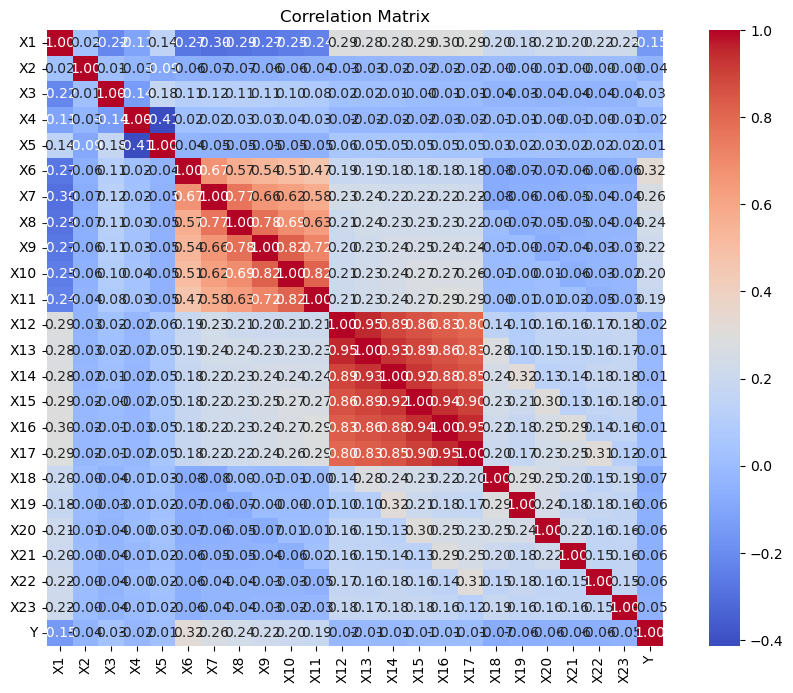

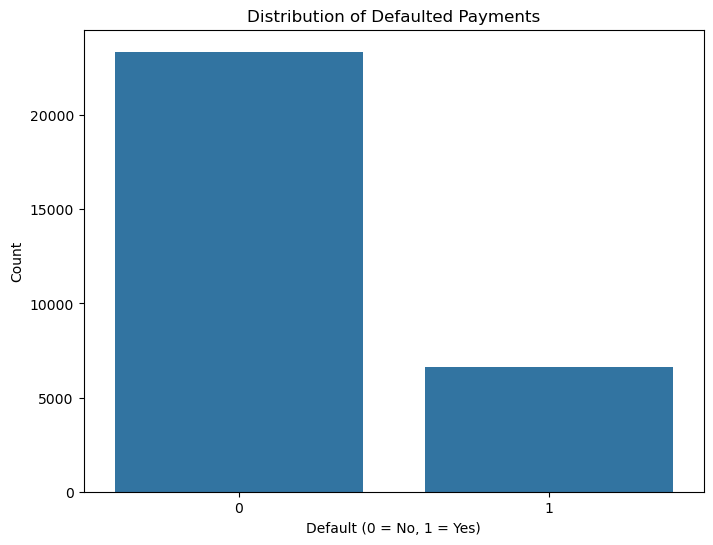

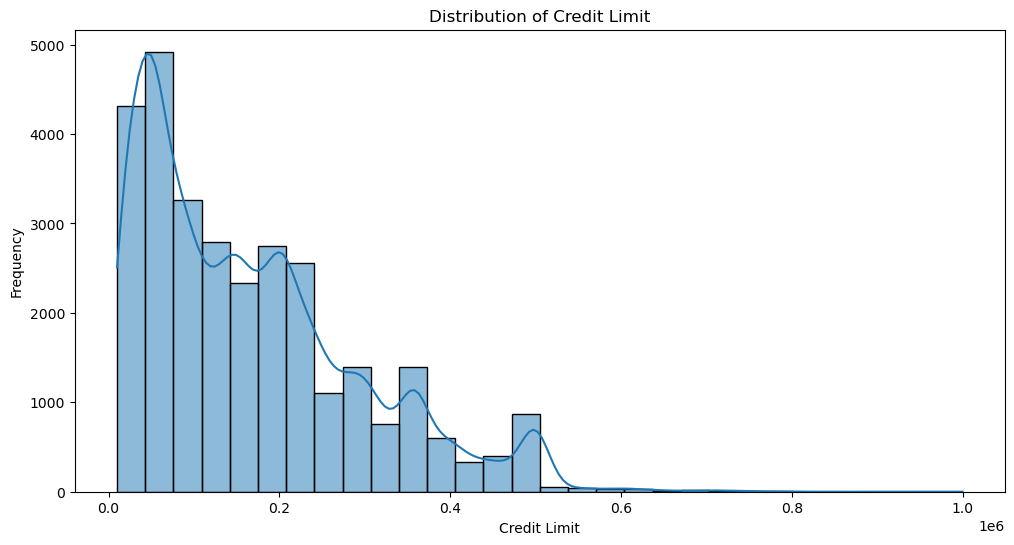

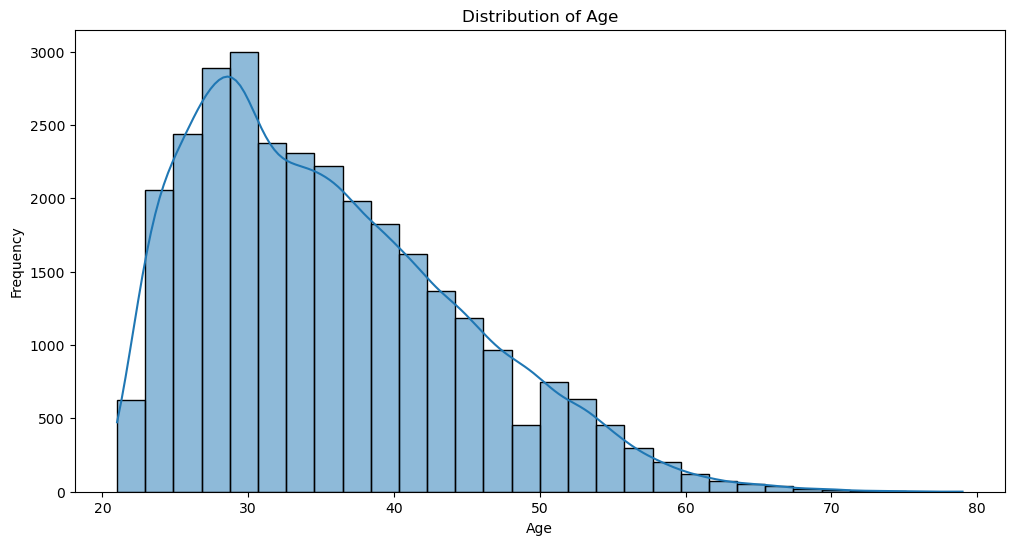


Mean values of features grouped by default status:
              X1        X2        X3        X4         X5        X6        X7  \
Y                                                                               
0  178099.726074  1.614150  1.841337  1.558637  35.417266 -0.211222 -0.301917   
1  130109.656420  1.567058  1.894665  1.528029  35.725738  0.668174  0.458258   

         X8        X9       X10  ...           X14           X15  \
Y                                ...                               
0 -0.316256 -0.355633 -0.389488  ...  47533.365605  43611.165254   
1  0.362116  0.254521  0.167872  ...  45181.598855  42036.950573   

            X16           X17          X18          X19          X20  \
Y                                                                      
0  40530.445343  39042.268704  6307.337357  6640.465074  5753.496833   
1  39540.190476  38271.435503  3397.044153  3388.649638  3367.351567   

           X21          X22          X23  
Y                 

In [29]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Y', data=df)
plt.title("Distribution of Defaulted Payments")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Visualize some important features
plt.figure(figsize=(12, 6))
sns.histplot(df['X1'], bins=30, kde=True)
plt.title("Distribution of Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['X5'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Grouping by default status and calculating mean for some features
mean_values = df.groupby('Y').mean()
print("\nMean values of features grouped by default status:")
print(mean_values)

## Let's have a look at outliers and pre-process our data set to optimize the efficiency of our ML methods

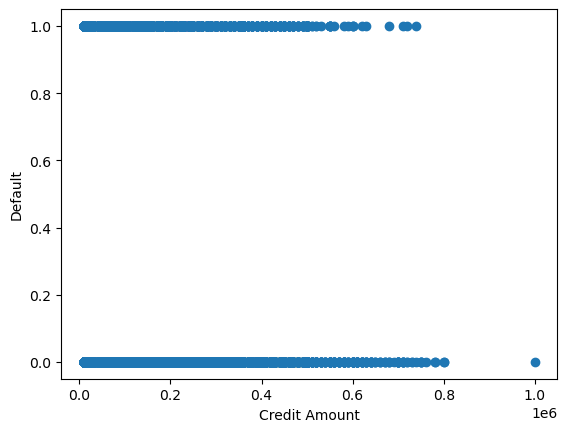

In [37]:
fig,ax = plt.subplots()
ax.scatter(x = df['X1'], y = df['Y'])
plt.ylabel('Default')
plt.xlabel('Credit Amount')
plt.show()

In [42]:
#Outlier row removed
df = df.drop(2197)

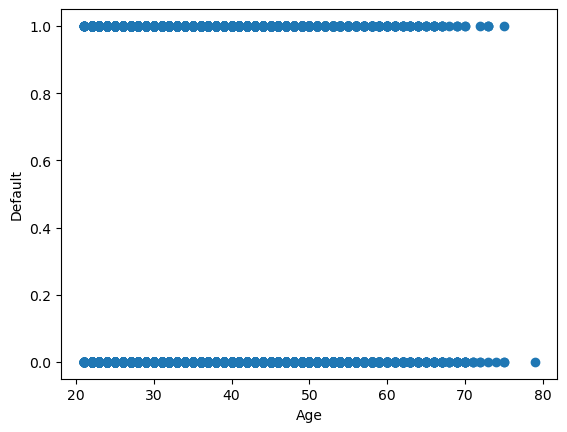

In [44]:
fig,ax = plt.subplots()
ax.scatter(x = df['X5'], y = df['Y'])
plt.ylabel('Default')
plt.xlabel('Age')
plt.show()

In [40]:
df[df['X1'] > 800000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
2197,1000000,2,1,1,47,0,0,0,-1,0,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


In [46]:
df[df['X5'] > 75]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
18245,440000,1,1,1,79,0,0,0,0,0,...,447112,438187,447543,15715,16519,16513,15800,16531,15677,0


In [48]:
df = df.drop(18245)

## Let's start our analysis and run several Machine Learning algorithims for this classification task and compare their results 

Performance Comparison:
                       Model  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression  0.808778   0.678625  0.231633  0.345378
1              Random Forest  0.813222   0.624221  0.357653  0.454752
2        K-Nearest Neighbors  0.793444   0.540825  0.341327  0.418517
3              Decision Tree  0.730000   0.389568  0.422959  0.405577
4  Support Vector Classifier  0.809222   0.687790  0.227041  0.341389


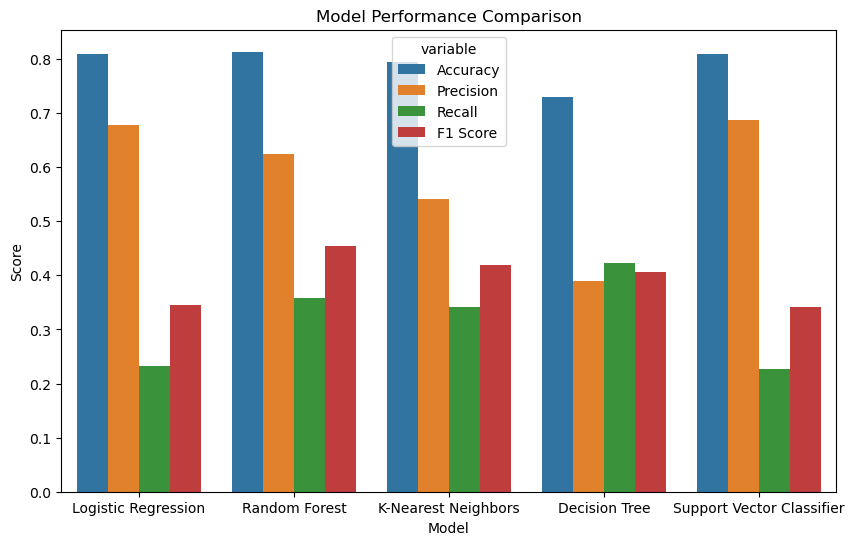


Best Model: Random Forest
Confusion Matrix:
[[6618  422]
 [1259  701]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.36      0.45      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [51]:
# # Load dataset
# from ucimlrepo import fetch_ucirepo
# default_data = fetch_ucirepo(id=350)  # Load UCI Default of Credit Card Clients dataset
# X = pd.DataFrame(default_data.data.features)
# y = pd.DataFrame(default_data.data.targets, columns=['default'])

# Data preprocessing
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Classifier": SVC(kernel="linear", random_state=42)
}

# Train, predict, and evaluate each model
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train.values.ravel())
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })


# Create a DataFrame to display results
results_df = pd.DataFrame(results)
print("Performance Comparison:")
print(results_df)

# Visualization of model comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

# Detailed Report for Best Model
best_model = models[results_df.loc[results_df["Accuracy"].idxmax(), "Model"]]
y_pred_best = best_model.predict(X_test)
print(f"\nBest Model: {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3271
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193
Performance Comparison:
                       Model  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression  0.808778   0.678625  0.231633  0.345378
1              Random Forest  0.813222   0.624221  0.357653  0.454752
2        K-Nearest Neighbors  0.793444   0.540825  0.341327  0.418517
3              Decision Tree  0.730000   0.389568  0.422959  0.405577
4  Support Vector Classifier  0.809222   0.687790  0.227041  0.341389

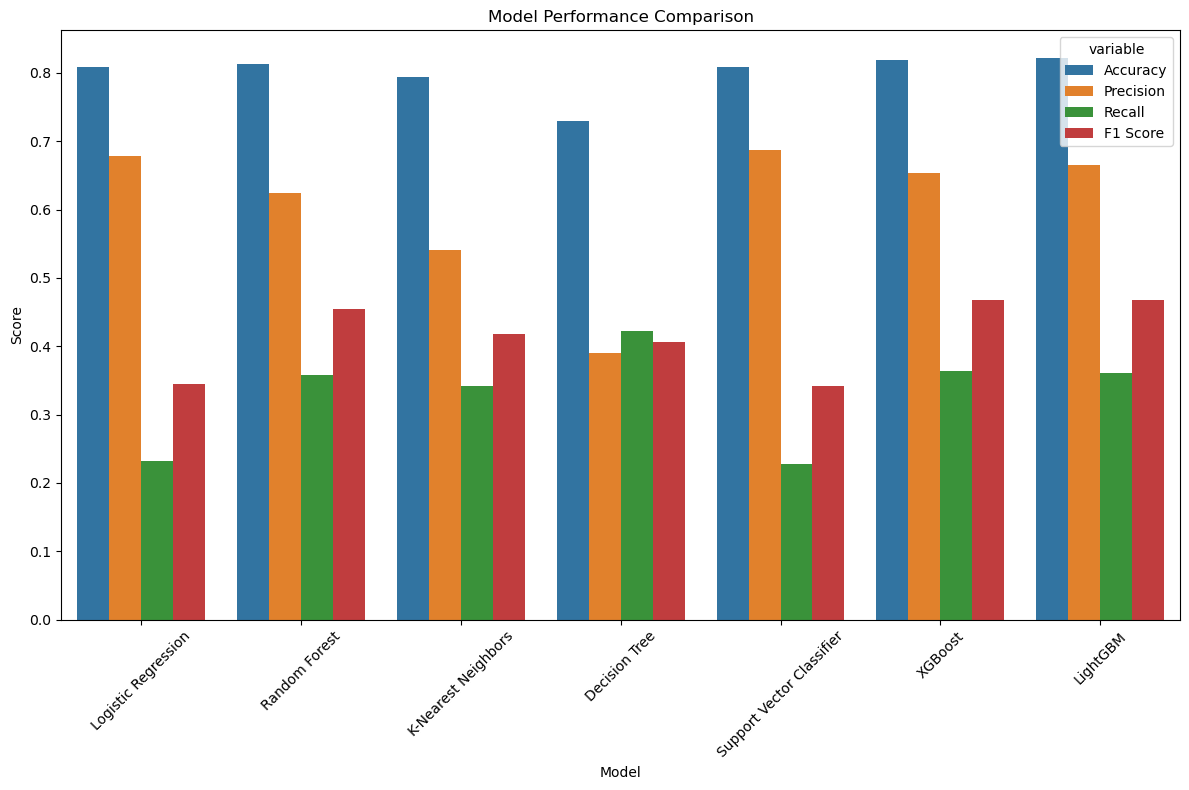


Best Model: LightGBM
Confusion Matrix:
[[6684  356]
 [1253  707]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [53]:
# Data preprocessing
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Classifier": SVC(kernel="linear", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train, predict, and evaluate each model
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train.values.ravel())
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)
print("Performance Comparison:")
print(results_df)

# Visualization of model comparison
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Detailed Report for Best Model
best_model_name = results_df.loc[results_df["Accuracy"].idxmax(), "Model"]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
print(f"\nBest Model: {best_model_name}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


### KNN hyperparameter tuning using GridSearch

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid for tuning the 'k' value in KNN
param_grid = {
    'n_neighbors': list(range(1, 101))  # Testing values of k from 1 to 100
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Set up the GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)



# Fit the grid search to the training data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best model after fitting
best_knn_model = grid_search.best_estimator_

# Print details of the best model
print(f"Best KNN Model:")
print(f"- Optimal number of neighbors (k): {grid_search.best_params_['n_neighbors']}")
print(f"- Best cross-validation score: {grid_search.best_score_:.4f}")

# Make predictions on the test data
y_pred_knn = best_knn_model.predict(X_test)

# Calculate evaluation metrics for the best KNN model
accuracy_knn = accuracy_score(y_test.values.ravel(), y_pred_knn)
print(f"Best KNN Model Accuracy on Test Set: {accuracy_knn:.4f}")


Best KNN Model:
- Optimal number of neighbors (k): 23
- Best cross-validation score: 0.8140
Best KNN Model Accuracy on Test Set: 0.8087


In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

In [ ]:
rfc_model.fit(X_train, y_train)   #Creating a sample RF model for Imbalance Check
pred = rfc_model.predict(X_test)

In [65]:
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

rfc_model = RandomForestClassifier()

rfc = cross_validate(rfc_model, X, y, cv=5, scoring=scoring)

pd.DataFrame({'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()]},
             index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

,Random Forest
Accuracy,0.816400
Precision,0.649540
Recall,0.371915
F1 Score,0.472628


In [69]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_validate
#from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
#import pandas as pd

# Define your scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Convert y to a NumPy array and flatten it
y = y.values.ravel()  # Use .to_numpy().ravel() if preferred

# Define and evaluate the model
rfc_model = RandomForestClassifier()
rfc = cross_validate(rfc_model, X, y, cv=5, scoring=scoring)

# Create a DataFrame to summarize the results
results = pd.DataFrame(
    {'Random Forest': [
        rfc['test_accuracy'].mean(),
        rfc['test_precision'].mean(),
        rfc['test_recall'].mean(),
        rfc['test_f1_score'].mean()
    ]},
    index=['Accuracy', 'Precision', 'Recall', 'F1 Score']
)

print(results)


           Random Forest
Accuracy        0.816500
Precision       0.649395
Recall          0.373270
F1 Score        0.473511


In [71]:
rfc_model.fit(X_train, y_train)   #Creating a sample RF model for Imbalance Check
pred = rfc_model.predict(X_test)
confusion = confusion_matrix(y_test, pred )
confusion

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([[6609,  431],
       [1235,  725]])

#There is significant amount of imbalance
#Data Resampling is required

In [78]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert X and y to NumPy arrays (if not already)
X = np.array(X)
y = np.array(y)

# Apply SMOTE to oversample the minority class
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Convert back to DataFrame (optional, for consistency)
X_res = pd.DataFrame(X_res, columns=X.columns if isinstance(X, pd.DataFrame) else None)
y_res = pd.DataFrame(y_res, columns=['Y'])

# Combine into a single DataFrame (optional)
res_ccd = pd.concat([X_res, y_res], axis=1)

# Split the resampled data into training and testing sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Train the Random Forest model on the resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res.values.ravel())

# Make predictions
y_pred_res = rf_model.predict(X_test_res)

# Evaluate the model
accuracy = accuracy_score(y_test_res, y_pred_res)
precision = precision_score(y_test_res, y_pred_res)
recall = recall_score(y_test_res, y_pred_res)
f1 = f1_score(y_test_res, y_pred_res)

# Print the results
print("Evaluation Metrics After Handling Imbalance with SMOTE:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_res, y_pred_res))
print("\nClassification Report:")
print(classification_report(y_test_res, y_pred_res))


Evaluation Metrics After Handling Imbalance with SMOTE:
Accuracy: 0.8369
Precision: 0.8548
Recall: 0.8119
F1 Score: 0.8328

Confusion Matrix:
[[6038  967]
 [1319 5695]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      7005
           1       0.85      0.81      0.83      7014

    accuracy                           0.84     14019
   macro avg       0.84      0.84      0.84     14019
weighted avg       0.84      0.84      0.84     14019



let's refit everything again:

[LightGBM] [Info] Number of positive: 16350, number of negative: 16359
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3457
[LightGBM] [Info] Number of data points in the train set: 32709, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499862 -> initscore=-0.000550
[LightGBM] [Info] Start training from score -0.000550
Performance Comparison:
                       Model  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression  0.716385   0.717124  0.715284  0.716203
1              Random Forest  0.836864   0.854507  0.812233  0.832834
2        K-Nearest Neighbors  0.753121   0.745475  0.769176  0.757140
3              Decision Tree  0.748770   0.742837  0.761477  0.752042
4  Support Vector Classifier  0.717384   0.723230  0.704876  0.71393

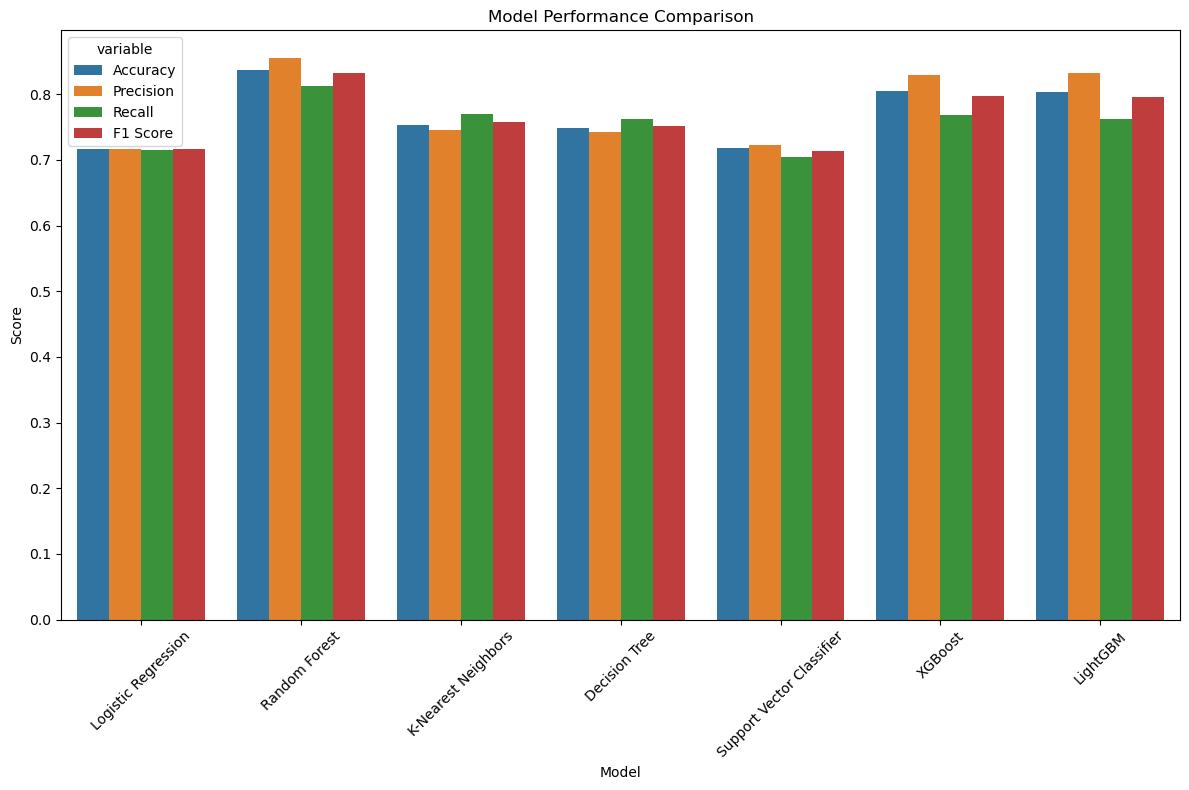


Best Model: Random Forest
Confusion Matrix:
[[6035  970]
 [1317 5697]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      7005
           1       0.85      0.81      0.83      7014

    accuracy                           0.84     14019
   macro avg       0.84      0.84      0.84     14019
weighted avg       0.84      0.84      0.84     14019



In [81]:
# Convert X and y to NumPy arrays (if not already)
X = np.array(X)
y = np.array(y)

# Address imbalance using SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Convert back to DataFrame (optional)
X_res = pd.DataFrame(X_res, columns=X.columns if isinstance(X, pd.DataFrame) else None)
y_res = pd.DataFrame(y_res, columns=['Y'])

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Classifier": SVC(kernel="linear", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train, predict, and evaluate each model
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train.values.ravel())
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)
print("Performance Comparison:")
print(results_df)

# Visualization of model comparison
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Detailed Report for Best Model
best_model_name = results_df.loc[results_df["Accuracy"].idxmax(), "Model"]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
print(f"\nBest Model: {best_model_name}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


## Random forest performs best - let's try to tune the forest to further boost performance

In [87]:
# Define the hyperparameter grid with valid values for max_features
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['sqrt', 'log2', None]  # Removed 'auto'
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Initialize the Random Forest model
rfc_model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfc_model,
    param_distributions=params,
    n_iter=10,  # Adjust for computational efficiency
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=3,
    random_state=42
)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_train, y_train.values.ravel())

# Display the best parameters and the corresponding model
print("Best Parameters:", random_search.best_params_)
best_rfc_model = random_search.best_estimator_

# Train the best model on the training data
best_rfc_model.fit(X_train, y_train.values.ravel())

# Evaluate the model on the test data
predicted = best_rfc_model.predict(X_test)

# Print evaluation metrics
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted))
print("\nClassification Report:")
print(classification_report(y_test, predicted))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=0.909 total time=  45.0s
[CV 3/5] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.912 total time=  30.6s
[CV 3/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.902 total time=  10.2s
[CV 5/5] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, score=0.910 total time= 1.9min


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=0.907 total time=  45.2s
[CV 4/5] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.905 total time=  30.6s
[CV 2/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.909 total time=  10.2s
[CV 4/5] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1400;, score=0.911 total time= 1.9min
[CV 2/5] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=0.915 total time=  45.1s
[CV 5/5] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.903 total time=  30.7s
[CV 5/5] END bootstrap=True, max_depth=40, max_features=sqrt, min_sampl

## final accuracy is 84.87%